<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Module_7_Two_Proportions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 7 includes comparing two population proportions. 

For those reading the OER text, we are in [Chapter 8](https://openstax.org/books/introductory-statistics/pages/8-introduction). 

Code Block 1: 

Determine the level of confidence and input data.

Determine the comparison type. (- or /) 

Code Block 2: 

Determines a confidence interval for the level of confidence chosen. 

Code Block 3: 

Bypasses all behind the scenes knowledge and just gives you the answer without knowing what is going on. (BORING!! yet helpful when you have large data sets.) 


In [9]:
### Code Block 1
# Input Data
z_conf=0.95 

sample1_count= 100
sample1_size = 125

sample2_count= 80
sample2_size = 120

sample1_complement = sample1_size-sample1_count 
sample2_complement = sample2_size-sample2_count 

data1=rep(c(1,0),c(sample1_count,sample1_complement))   # repeats "1" sample_count times and "0" sample_complement times. 
data2=rep(c(1,0),c(sample2_count,sample2_complement))   # repeats "1" sample_count times and "0" sample_complement times. 

comparison = c("differenece in population parameters")

cat(sep="", "The first sample has a proportion of ", mean(data1), " and the second sample has a proportion of ", mean(data2),".\n")

The first sample has a proportion of 0.8 and the second sample has a proportion of 0.6666667.


With a confidence level of 95%, the actual differenece in population parameters is between 0.02351665 and 0.2432564.


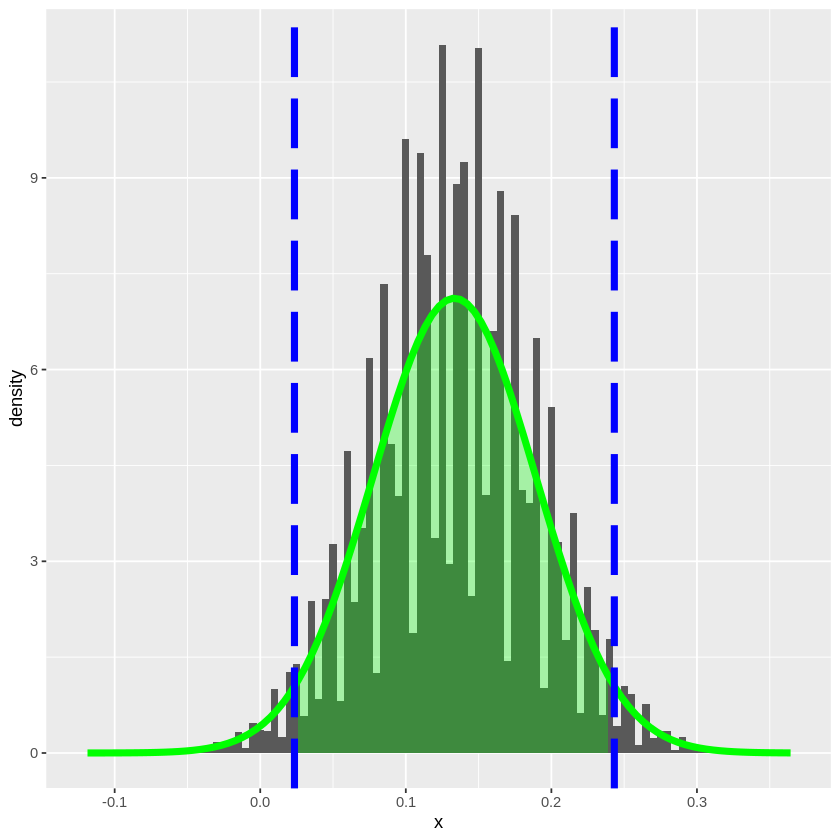

In [29]:
### Code Block 2
# For two proportions. 

alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)

test <- 0
test_runs = 100000
for(i in 1:test_runs){
  ##################################################################################################
  ## How are you comparing? Difference? Ratio? 
  ## Change the operation in the next line. 
  ##################################################################################################
  test[i] = mean( sample(data1,sample1_size,replace=TRUE)) - mean( sample(data2,sample2_size,replace=TRUE))
  }

Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

library(ggplot2)

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

ggplot( Boot, aes(x)) + 
  geom_histogram(aes(y=..density..),binwidth=0.005) + 
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual ", comparison, " is between ", Boot_left, " and ", Boot_right, ".\n")

In [ ]:
install.packages("mratios")

In [30]:
auto=t.test(data1, data2, conf.level=z_conf)
cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual difference", 
              " in proportions is between ", auto$conf.int[1], 
            " and ", auto$conf.int[2], ".\n")

library(mratios)
auto=ttestratio(data1, data2, conf.level=z_conf)
cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual ratio", 
              " of proportions is between ", auto$conf.int[1], 
            " and ", auto$conf.int[2], ".\n")

With a confidence level of 95%, the actual difference in proportions is between 0.02262143 and 0.2440452.
With a confidence level of 95%, the actual ratio of proportions is between 1.030806 and 1.409025.
